In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

np.random.seed(17)
tf.random.set_seed(17)

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
val_frac = 0.25

x_val = x_train[round((1-val_frac) * len(x_train)):]
y_val = y_train[round((1-val_frac) * len(y_train)):]

x_train = x_train[:round((1-val_frac) * len(x_train))]
y_train = y_train[:round((1-val_frac) * len(y_train))]

In [9]:
stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=4,
                                            verbose=1)

Epoch 1/50
44/44 [==============================] - 4s 68ms/step - loss: 0.9126 - accuracy: 0.7024 - val_loss: 0.7442 - val_accuracy: 0.7472
Epoch 2/50
44/44 [==============================] - 2s 56ms/step - loss: 0.3524 - accuracy: 0.8754 - val_loss: 0.4617 - val_accuracy: 0.8329
Epoch 3/50
44/44 [==============================] - 2s 54ms/step - loss: 0.2960 - accuracy: 0.8931 - val_loss: 0.3799 - val_accuracy: 0.8608
Epoch 4/50
44/44 [==============================] - 2s 53ms/step - loss: 0.2534 - accuracy: 0.9091 - val_loss: 0.3427 - val_accuracy: 0.8755
Epoch 5/50
44/44 [==============================] - 2s 54ms/step - loss: 0.2307 - accuracy: 0.9162 - val_loss: 0.3342 - val_accuracy: 0.8790
Epoch 6/50
44/44 [==============================] - 3s 63ms/step - loss: 0.2094 - accuracy: 0.9254 - val_loss: 0.3364 - val_accuracy: 0.8809
Epoch 7/50
44/44 [==============================] - 3s 63ms/step - loss: 0.1857 - accuracy: 0.9362 - val_loss: 0.3293 - val_accuracy: 0.8823
Epoch 8/50
44

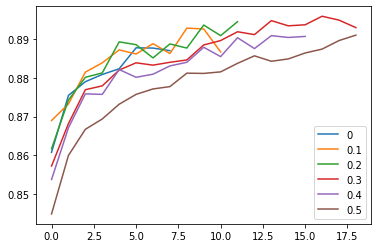

In [8]:
dropout_range = [0, 0.1, 0.2, 0.3, 0.4, 0.5]

for drp in dropout_range:
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.BatchNormalization(),
#        tf.keras.layers.Dense(28*28, activation='relu'),
#        tf.keras.layers.BatchNormalization(),
#        tf.keras.layers.Dropout(drp),
        tf.keras.layers.Dense(300, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(drp),
        tf.keras.layers.Dense(300, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(drp),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train,
                        validation_data=(x_val, y_val),
                        batch_size=1024,
                        epochs=50,
                        callbacks=[stopping]) # коллбэк не позволит переобучиться, не нужно заморачиваться над лоссом
    
    # после завершения обучения построим графики
    # значений нашей метрики на валидации
    plt.plot(history.history['val_accuracy'][2:])

plt.legend(dropout_range)
plt.show()

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    validation_data=(x_val, y_val),
                    batch_size=1024,
                    epochs=50,
                    callbacks=[stopping])

Epoch 1/50
44/44 [==============================] - 4s 74ms/step - loss: 1.1793 - accuracy: 0.6276 - val_loss: 0.9377 - val_accuracy: 0.7449
Epoch 2/50
44/44 [==============================] - 3s 67ms/step - loss: 0.5175 - accuracy: 0.8184 - val_loss: 0.5096 - val_accuracy: 0.8285
Epoch 3/50
44/44 [==============================] - 3s 73ms/step - loss: 0.4439 - accuracy: 0.8430 - val_loss: 0.4131 - val_accuracy: 0.8536
Epoch 4/50
44/44 [==============================] - 3s 80ms/step - loss: 0.4000 - accuracy: 0.8550 - val_loss: 0.3751 - val_accuracy: 0.8666
Epoch 5/50
44/44 [==============================] - 3s 79ms/step - loss: 0.3892 - accuracy: 0.8584 - val_loss: 0.3485 - val_accuracy: 0.8737
Epoch 6/50
44/44 [==============================] - 3s 80ms/step - loss: 0.3637 - accuracy: 0.8668 - val_loss: 0.3447 - val_accuracy: 0.8750
Epoch 7/50
44/44 [==============================] - 4s 82ms/step - loss: 0.3491 - accuracy: 0.8743 - val_loss: 0.3237 - val_accuracy: 0.8823
Epoch 8/50
44

In [11]:
print('Проверяем на тестовых данных:')
model.evaluate(x_test, y_test)

print('А на валидации было:')
model.evaluate(x_val, y_val)

Проверяем на тестовых данных:
313/313 [==============================] - 1s 2ms/step - loss: 0.3247 - accuracy: 0.8935
А на валидации было:
469/469 [==============================] - 1s 1ms/step - loss: 0.2980 - accuracy: 0.8980


[0.2980405390262604, 0.8980000019073486]